In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [113]:
df_abalone = pd.read_csv('src/data/abalone_dataset.csv')
df_abalone.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [114]:
df_abalone.columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']
df_abalone = df_abalone.replace(['M','F','I'],[0, 1, 2])
df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


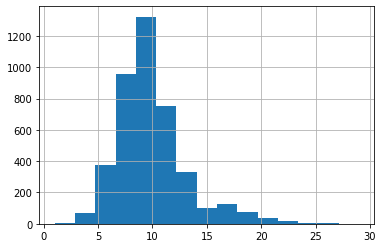

In [115]:
# The target variable of this exercise is Rings, so you can start with that. 
# A histogram will give you a quick and useful overview of the age ranges that you can expect:
plt.hist(df_abalone["Rings"], bins=15)
plt.grid()
plt.show()

In [116]:
corr = df_abalone.corr()
corr["Rings"]


Sex              -0.351547
Length            0.557123
Diameter          0.575005
Height            0.558109
Whole weight      0.540818
Shucked weight    0.421256
Viscera weight    0.504274
Shell weight      0.628031
Rings             1.000000
Name: Rings, dtype: float64

In [117]:
df_abalone = df_abalone.drop("Sex", axis = 1)
df_abalone.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [118]:
# Note that you use a capital letter for X but a lowercase letter for y. 
# This is often done in machine learning code because mathematical notation 
# generally uses a capital letter for matrices and a lowercase letter for vectors.
X = df_abalone
X = X.drop("Rings", axis=1)
X.head()
y = df_abalone["Rings"]
y.head()

0     7
1     9
2    10
3     7
4     8
Name: Rings, dtype: int64

In [119]:
# you should first get your pandas DataFrame into a NumPy array using the .values attribute:
# X is the independent variables and y is the dependent variable of your model.
X = X.values
y = y.values

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

In [121]:
# implementation of the kNN algorithm:

class KNearestNeighbors:
  def __init__(self, k):
      self.k = k

  #train
  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  
  def euclideanDistance(self, a, b):
        dis = np.sqrt(np.sum((a - b) ** 2))
        return dis

  def nearNeighbors(self, Xdata):
      dists = []
      for train in self.X_train:
        dist = self.euclideanDistance(train, Xdata)
        dists.append(dist)
      sort_idx = np.argsort(dists)
      sort_target = self.Y_train[sort_idx]
      return sort_target[0: self.k]

  def predict(self, Xdata):
      neighbors = self.nearNeighbors(Xdata)
      predict_result = np.argmax(np.bincount(neighbors))
      return predict_result
  
  def evaluate(self, X_test, Y_test):
    cv_predict = []
    for test in X_test:
      cv = self.predict(test)
      cv_predict.append(cv)
    result_cv = cv_predict - Y_test
    # count zeros in 1d array
    n_zeros = np.count_nonzero(result_cv== 0)
    acc = n_zeros / len(Y_test)
    return acc


In [122]:
result_K = []
for k in range (7,13,2):
  knn = KNearestNeighbors(k)
  knn.fit(X_train, Y_train)
  accuracy = knn.evaluate(X_test, Y_test )
  print(accuracy)
  result_K.append([accuracy, k])
best = max(result_K)
print("best accuracy and best k is : ", best)

0.215311004784689
0.2069377990430622
0.21291866028708134
best accuracy and best k is :  [0.215311004784689, 7]


In [123]:
# implementation of the kNN algorithm used in scikit-learn
from sklearn.neighbors import KNeighborsClassifier
result_K= []
for k in range(3, 15 ,2):
    neigh = KNeighborsClassifier(k)
    neigh.fit(X_train, Y_train)
    cv_predict = neigh.predict(X_test)
    result_cv = cv_predict - Y_test
    # count zeros in 1d array
    n_zeros = np.count_nonzero(result_cv== 0)
    acc = n_zeros / len(Y_test)
    print(acc)
    result_K.append([acc, k])
print(result_K)

0.20813397129186603
0.1901913875598086
0.215311004784689
0.2069377990430622
0.21291866028708134
0.2021531100478469
[[0.20813397129186603, 3], [0.1901913875598086, 5], [0.215311004784689, 7], [0.2069377990430622, 9], [0.21291866028708134, 11], [0.2021531100478469, 13]]


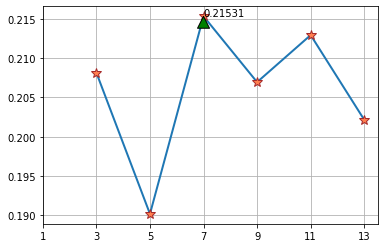

In [124]:
import matplotlib.pyplot as plt
df = pd.DataFrame(result_K, columns=['accuracy','k'])
df.head()
plt.plot(df['k'],df['accuracy'], marker = '*', ms= 10, mec= '#A52A2A', mfc= '#FF7F50', lw=2)
plt.grid()
plt.xticks(np.arange(1,14,2), np.arange(1,14,2))
ymax = df['accuracy'].max()
ymax
ymaxStr = str(round(ymax,5))
# ymaxStr = ('best k ',ymaxStr)
xpos = df.loc[df['accuracy']== ymax]['k'].reset_index()
xpos = xpos['k'][0]
xmax = xpos
# xpos
plt.annotate(ymaxStr, xy=(xmax, ymax), xytext= (xmax, ymax), arrowprops=dict(facecolor='green'))
plt.show()

# show Max Revenue point


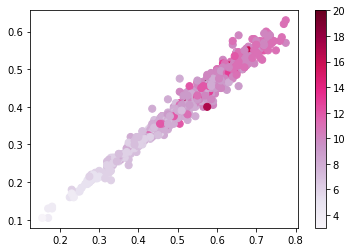

"\nOn this graph, each point is an abalone from the test set, with its actual length and actual diameter on the X- and Y-axis, respectively.\nThe color of the point reflects the predicted age. You can see that the longer and larger an abalone is, \nthe higher its predicted age. This is logical, and it's a positive sign. It means that your model is learning something that seems correct.\nTo confirm whether this trend exists in actual abalone data, \nyou can do the same for the actual values by simply replacing the variable that is used for c:\n"

In [125]:
f, points = plt.subplots()
points = plt.scatter(X_test[:, 0], X_test[:, 1], c= cv_predict, s= 50, cmap= 'PuRd')
f.colorbar(points)
plt.show()

'''
On this graph, each point is an abalone from the test set, with its actual length and actual diameter on the X- and Y-axis, respectively.
The color of the point reflects the predicted age. You can see that the longer and larger an abalone is, 
the higher its predicted age. This is logical, and it's a positive sign. It means that your model is learning something that seems correct.
To confirm whether this trend exists in actual abalone data, 
you can do the same for the actual values by simply replacing the variable that is used for c:
'''

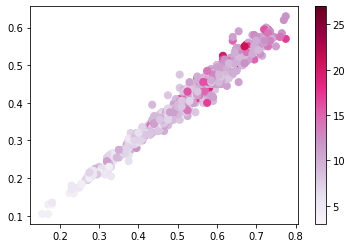

'\nThis confirms that the trend your model is learning does indeed make sense.\n'

In [126]:
f, points = plt.subplots()
points = plt.scatter(X_test[:, 0], X_test[:, 1], c= Y_test, s= 50, cmap= 'PuRd')
f.colorbar(points)
plt.show()
'''
This confirms that the trend your model is learning does indeed make sense.
'''